In [61]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
company_data = []
html_text = requests.get('https://stockanalysis.com/list/toronto-stock-exchange/').text
soup = BeautifulSoup(html_text, 'lxml')

# Find all rows in the stock table
stocks = soup.find_all('tr', class_='svelte-eurwtr')
# Loop through each stock row
print("Current Stock data")
for stock in stocks:
    # Extract all <td> elements in this row
    columns = stock.find_all('td')
    if len(columns) >= 7:
        Company_name = columns[2].text.strip()             # Company Name
        Company_Revenue = columns[6].text.strip()          # Revenue
        Company_stock_Price = columns[4].text.strip()      # Stock Price
    
    # Append the extracted data as a dictionary
        company_data.append({
            'Company Name': Company_name,
            'Revenue': Company_Revenue,
            'Stock Price': Company_stock_Price
        })
# Create a DataFrame from the collected data
df = pd.DataFrame(company_data)

# Print the DataFrame as a grid
print(df)

Current Stock data
                                       Company Name  Revenue Stock Price
0                              Royal Bank of Canada   56.51B      172.09
1                                      Shopify Inc.   10.63B      112.05
2                         The Toronto-Dominion Bank   52.31B       77.32
3                                     Enbridge Inc.   43.52B       56.25
4                            Brookfield Corporation  133.67B       74.70
..                                              ...      ...         ...
495                   The Keg Royalties Income Fund   33.79M       15.72
496                            Arizona Metals Corp.        -        1.45
497              DIRTT Environmental Solutions Ltd.  249.80M        0.90
498             International Tower Hill Mines Ltd.        -        0.87
499  Dream Residential Real Estate Investment Trust   33.77M        7.70

[500 rows x 3 columns]


In [62]:
print(df.dtypes)

Company Name    object
Revenue         object
Stock Price     object
dtype: object


In [63]:
df = pd.DataFrame(company_data)

In [64]:
df['Stock Price'] = pd.to_numeric(df['Stock Price'], errors='coerce')

In [65]:
print("DataFrame before sorting:")
print(df)

DataFrame before sorting:
                                       Company Name  Revenue  Stock Price
0                              Royal Bank of Canada   56.51B       172.09
1                                      Shopify Inc.   10.63B       112.05
2                         The Toronto-Dominion Bank   52.31B        77.32
3                                     Enbridge Inc.   43.52B        56.25
4                            Brookfield Corporation  133.67B        74.70
..                                              ...      ...          ...
495                   The Keg Royalties Income Fund   33.79M        15.72
496                            Arizona Metals Corp.        -         1.45
497              DIRTT Environmental Solutions Ltd.  249.80M         0.90
498             International Tower Hill Mines Ltd.        -         0.87
499  Dream Residential Real Estate Investment Trust   33.77M         7.70

[500 rows x 3 columns]


In [66]:
print(df.dtypes)

Company Name     object
Revenue          object
Stock Price     float64
dtype: object


In [67]:
df_sorted = df.sort_values(by='Stock Price', ascending=False)

In [68]:
df_sorted.head()

,Company Name,Revenue,Stock Price
315,Senvest Capital Inc.,162.84M,325.00
23,Intact Financial Corporation,29.55B,270.47
76,FirstService Corporation,6.66B,265.38
18,"Waste Connections, Inc.",11.75B,251.27
40,WSP Global Inc.,14.84B,251.16


In [69]:
#data visualizations
import matplotlib.pyplot as plt

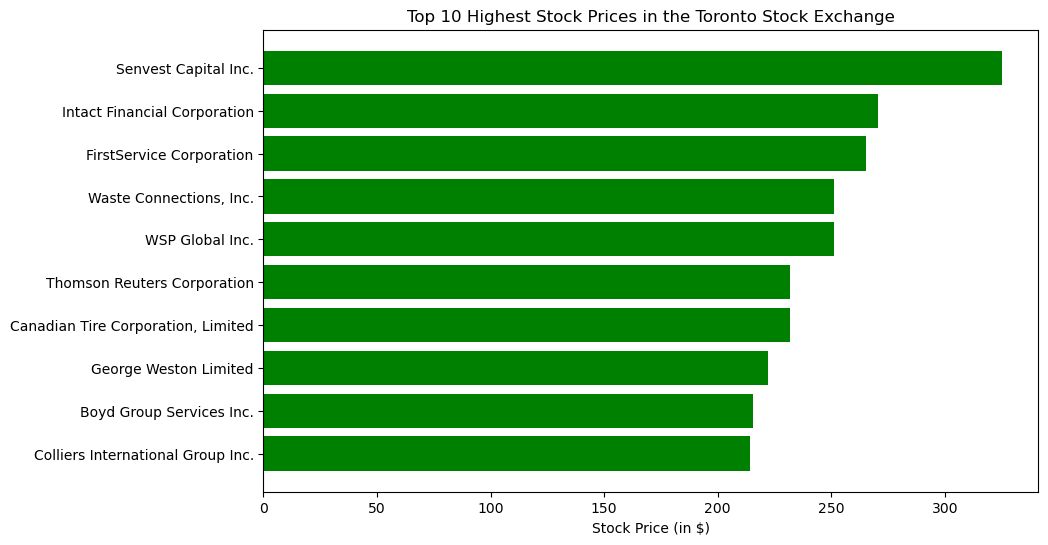

In [75]:
top_10 = df_sorted.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10['Company Name'], top_10['Stock Price'], color='green')
plt.xlabel('Stock Price (in $)')
plt.title('Top 10 Highest Stock Prices in the Toronto Stock Exchange')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest price on top
plt.show()